In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [297]:
df1=pd.read_csv("Entities.csv")
df1.head(3)

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008


In [298]:
df1.shape

(168446, 18)

In [299]:
df1.purpose.unique()

array(['For Sale', 'For Rent'], dtype=object)

In [300]:
df1[df1.purpose=="For Rent"].head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
35,35,858689,3190,https://www.zameen.com/Property/dha_defence_ph...,House,110000,DHA Defence,Islamabad,Islamabad Capital,33.542039,73.093414,5,For Rent,5,10/20/2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,5445.000
36,36,877435,165,https://www.zameen.com/Property/islamabad_f_7_...,House,600000,F-7,Islamabad,Islamabad Capital,33.720413,73.056493,6,For Rent,6,10/20/2018,Nexus Estate Services,Ch Afzal/ Ch Faisal/ Ch Adeel,10890.000
37,37,981663,3349,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,Islamabad,Islamabad Capital,33.633416,72.918220,2,For Rent,2,10/20/2018,NaN,NaN,2178.008
38,38,1838236,1378,https://www.zameen.com/Property/islamabad_paki...,House,45000,Pakistan Town,Islamabad,Islamabad Capital,33.575405,73.143325,5,For Rent,3,7/11/2019,NaN,NaN,65340.000
39,39,1871937,156,https://www.zameen.com/Property/islamabad_bhar...,Upper Portion,12000,Bhara kahu,Islamabad,Islamabad Capital,33.737402,73.179159,2,For Rent,2,2/4/2019,NaN,NaN,1361.255


In [301]:
df2 = df1.drop(df1[df1['purpose'] == "For Rent"].index)

In [302]:
df2.shape

(120655, 18)

In [303]:
df3=df2.drop(['property_id','location_id','page_url','latitude','longitude','date_added','agency','agent'],axis=1)

In [304]:
df3.head()

,Unnamed: 0,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
0,0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089.004
1,1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,15246.056
2,2,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178.008
3,3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890.000
4,4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178.008


In [305]:
df3.purpose.unique()

array(['For Sale'], dtype=object)

In [306]:
df4=df3.drop(['Unnamed: 0','purpose','province_name'],axis=1)
df4.head(3)

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008


In [307]:
df4.property_type.unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [308]:
df4.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [309]:
df4.isna().sum()

property_type    0
price            0
location         0
city             0
baths            0
bedrooms         0
Total_Area       0
dtype: int64

In [310]:
df4.baths.unique()

array([  2,   3,   6,   4,   8,   7,   5,   0,   1,  10,   9,  11,  13,
        12, 403,  14], dtype=int64)

In [311]:
df4.bedrooms.unique()

array([ 2,  3,  5,  4,  8,  7,  0,  1,  6, 10, 12, 11,  9, 14, 15, 16, 13,
       18, 25, 27], dtype=int64)

In [312]:
df4[df4.bedrooms==0].shape

(13119, 7)

In [313]:
df5=df4.drop(df4[df4['bedrooms'] == 0].index)

In [314]:
df6=df5.drop(df5[df5.baths > (df5.bedrooms+2)].index)
df6.head(3)

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008


In [315]:
df6[df6.baths==0].shape

(14769, 7)

In [316]:
df6.groupby('city')['baths'].apply(lambda x: (x == 0).sum())

city
Faisalabad     452
Islamabad     1558
Karachi       5814
Lahore        5357
Rawalpindi    1588
Name: baths, dtype: int64

In [317]:
df7=df6.drop(df6[df6['baths'] == 0].index)
df7.shape

(92363, 7)

In [318]:
df7.groupby('city').count()

,property_type,price,location,baths,bedrooms,Total_Area
city,,,,,,
Faisalabad,1758,1758,1758,1758,1758,1758
Islamabad,12215,12215,12215,12215,12215,12215
Karachi,36213,36213,36213,36213,36213,36213
Lahore,33960,33960,33960,33960,33960,33960
Rawalpindi,8217,8217,8217,8217,8217,8217


In [319]:
df7=df7.drop(df7[df7['Total_Area'] == 0].index)

In [320]:
df7 = df7[df7['Total_Area'] / df7['bedrooms'] > 300]

In [321]:
df7['Price_per_Area']=df7.price/df7.Total_Area

In [322]:
df7.head(3)

,property_type,price,location,city,baths,bedrooms,Total_Area,Price_per_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004,9182.702727
1,Flat,6900000,E-11,Islamabad,3,3,15246.056,452.576063
2,House,16500000,G-15,Islamabad,6,5,2178.008,7575.729749


In [323]:
df7.describe()

,price,baths,bedrooms,Total_Area,Price_per_Area
count,8.523500e+04,85235.000000,85235.000000,8.523500e+04,85235.000000
mean,2.561856e+07,3.997912,3.778014,1.219116e+04,5565.608588
std,3.802694e+07,1.765759,1.572753,3.472484e+05,5310.508070
min,1.000000e+00,1.000000,1.000000,5.445020e+02,0.000077
25%,8.000000e+06,3.000000,3.000000,2.178008e+03,843.002218
50%,1.450000e+07,4.000000,3.000000,5.445000e+03,5325.967581
75%,2.800000e+07,5.000000,5.000000,1.197904e+04,8342.918136
max,2.000000e+09,12.000000,16.000000,9.377379e+07,316803.244065


In [324]:
def remove_ppa_outlier(df):
    df_final=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.Price_per_Area)
        st=np.std(subdf.Price_per_Area)
        reduce_df=subdf[(subdf.Price_per_Area>(m-st))&(subdf.Price_per_Area<=(m+st))]
        df_final=pd.concat([df_final,reduce_df],ignore_index=True)
    return df_final

In [325]:
df8=remove_ppa_outlier(df7)
df8.shape

(62819, 8)

In [326]:
df8.describe()

,price,baths,bedrooms,Total_Area,Price_per_Area
count,6.281900e+04,62819.000000,62819.000000,6.281900e+04,62819.000000
mean,2.309079e+07,4.048775,3.803069,9.381772e+03,5077.378601
std,3.093718e+07,1.727092,1.513304,2.585464e+04,3927.627671
min,1.000000e+00,1.000000,1.000000,5.445020e+02,0.000077
25%,8.400000e+06,3.000000,3.000000,2.178008e+03,994.792795
50%,1.450000e+07,4.000000,4.000000,4.900518e+03,5399.429203
75%,2.600000e+07,5.000000,5.000000,1.197904e+04,7897.124345
max,1.450000e+09,12.000000,16.000000,2.586375e+06,49848.957658


In [327]:
df8.groupby(['property_type','city']).count()

price  location  baths  bedrooms  Total_Area  \
property_type city                                                       
Farm House    Faisalabad      1         1      1         1           1   
              Islamabad      38        38     38        38          38   
              Karachi        22        22     22        22          22   
              Lahore         69        69     69        69          69   
              Rawalpindi      4         4      4         4           4   
Flat          Faisalabad      4         4      4         4           4   
              Islamabad    1833      1833   1833      1833        1833   
              Karachi     12396     12396  12396     12396       12396   
              Lahore        773       773    773       773         773   
              Rawalpindi    220       220    220       220         220   
House         Faisalabad    907       907    907       907         907   
              Islamabad    5584      5584   5584      5584        5584   
              Karachi      9821      9821   9821      9821        9821   
              Lahore      23509     23509  23509     23509       23509   
              Rawalpindi   5239      5239   5239      5239        5239   
Lower Portion Faisalabad      1         1      1         1           1   
              Islamabad       1         1      1         1           1   
              Karachi       574       574    574       574         574   
              Lahore         26        26     26        26          26   
              Rawalpindi      1         1      1         1           1   
Penthouse     Islamabad      10        10     10        10          10   
              Karachi       159       159    159       159         159   
              Lahore          4         4      4         4           4   
              Rawalpindi      1         1      1         1           1   
Room          Islamabad       2         2      2         2           2   
              Karachi         3         3      3         3           3   
Upper Portion Faisalabad      1         1      1         1           1   
              Islamabad       4         4      4         4           4   
              Karachi      1583      1583   1583      1583        1583   
              Lahore         27        27     27        27          27   
              Rawalpindi      2         2      2         2           2   

                          Price_per_Area  
property_type city                        
Farm House    Faisalabad               1  
              Islamabad               38  
              Karachi                 22  
              Lahore                  69  
              Rawalpindi               4  
Flat          Faisalabad               4  
              Islamabad             1833  
              Karachi              12396  
              Lahore                 773  
              Rawalpindi             220  
House         Faisalabad             907  
              Islamabad             5584  
              Karachi               9821  
              Lahore               23509  
              Rawalpindi            5239  
Lower Portion Faisalabad               1  
              Islamabad                1  
              Karachi                574  
              Lahore                  26  
              Rawalpindi               1  
Penthouse     Islamabad               10  
              Karachi                159  
              Lahore                   4  
              Rawalpindi               1  
Room          Islamabad                2  
              Karachi                  3  
Upper Portion Faisalabad               1  
              Islamabad                4  
              Karachi               1583  
              Lahore                  27  
              Rawalpindi               2

In [328]:
df9 = df8[(df8['property_type'] == 'House') & (df8['city'] =='Lahore')]
df9.shape

(23509, 8)

In [329]:
df9.describe()

,price,baths,bedrooms,Total_Area,Price_per_Area
count,2.350900e+04,23509.000000,23509.000000,2.350900e+04,23509.000000
mean,2.796374e+07,4.797014,4.229912,4.240153e+03,7832.518660
std,2.676455e+07,1.447325,1.174142,2.763619e+04,2503.746357
min,4.000000e+05,1.000000,1.000000,5.445020e+02,1.836547
25%,1.220000e+07,4.000000,3.000000,1.361255e+03,6427.915519
50%,2.100000e+07,5.000000,4.000000,2.722510e+03,7805.325987
75%,3.700000e+07,6.000000,5.000000,5.445000e+03,9182.702727
max,7.000000e+08,12.000000,11.000000,2.586375e+06,36730.810906


In [330]:
df9.head()

,property_type,price,location,city,baths,bedrooms,Total_Area,Price_per_Area
17,House,11000000,AWT Army Welfare Trust,Lahore,4,4,2722.510,4040.389200
18,House,19000000,AWT Army Welfare Trust,Lahore,4,3,5445.000,3489.439853
19,House,5000000,AWT Army Welfare Trust,Lahore,2,3,1361.255,3673.081091
20,House,21000000,AWT Army Welfare Trust,Lahore,6,5,5445.000,3856.749311
21,House,11000000,AWT Army Welfare Trust,Lahore,5,5,2722.510,4040.389200


In [362]:
counts_by_location = df9.groupby('location').count()
counts_by_location_sorted = counts_by_location.sort_values(by='property_type', ascending=False)
df9 = df9[~df9['location'].isin(counts_by_location[counts_by_location['property_type'] < 300].index)]
print(counts_by_location_sorted)

                                   property_type  price  city  baths  \
location                                                               
DHA Defence                                 6375   6375  6375   6375   
Bahria Town                                 3850   3850  3850   3850   
Johar Town                                   866    866   866    866   
State Life Housing Society                   738    738   738    738   
Wapda Town                                   517    517   517    517   
Allama Iqbal Town                            478    478   478    478   
Bahria Orchard                               447    447   447    447   
Askari                                       444    444   444    444   
Model Town                                   407    407   407    407   
Paragon City                                 399    399   399    399   
Gulberg                                      313    313   313    313   
Al Rehman Garden                             311    311   311   

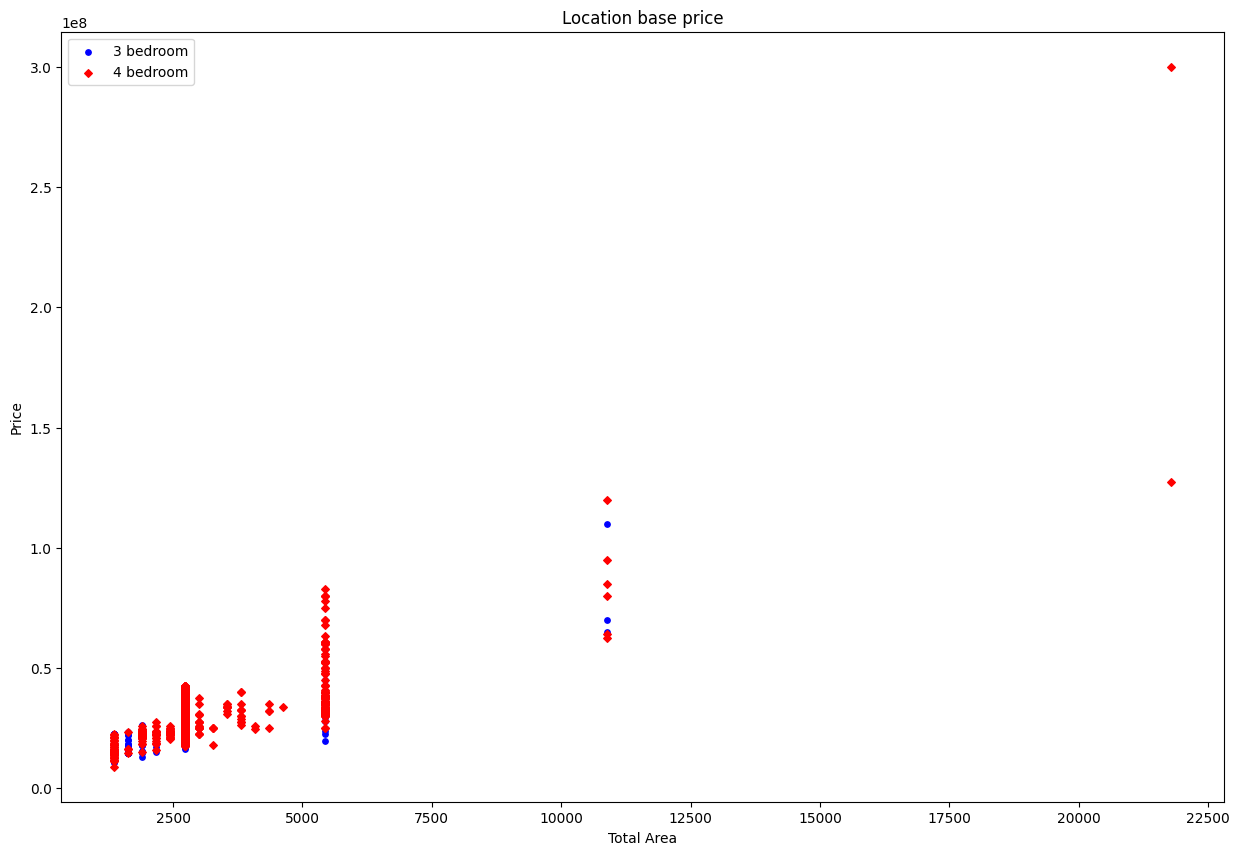

In [363]:
import matplotlib
def plot_scatter_chart(df,location):
    b1=df[(df.location==location)&(df.bedrooms==3)]
    b2=df[(df.location==location)&(df.bedrooms==4)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(b1.Total_Area,b1.price, color="blue", label="3 bedroom",s=15)
    plt.scatter(b2.Total_Area,b2.price, color="red",marker="D", label="4 bedroom",s=15)
    plt.xlabel("Total Area")
    plt.ylabel("Price")
    plt.title("Location base price")
    plt.legend()
    
plot_scatter_chart(df9,"DHA Defence")

In [364]:
def remove_lowPrice_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        b_stats={}
        for b, b_df in location_df.groupby('bedrooms'):
            b_stats[b]={
                'mean':np.mean(b_df.Price_per_Area),
                'std':np.std(b_df.Price_per_Area),
                'count':b_df.shape[0]
            }
        for b, b_df in location_df.groupby('bedrooms'):
            stats=b_stats.get(b-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, b_df[b_df.Price_per_Area<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [365]:
df10=remove_lowPrice_outliers(df9)
df10.shape

(8402, 8)

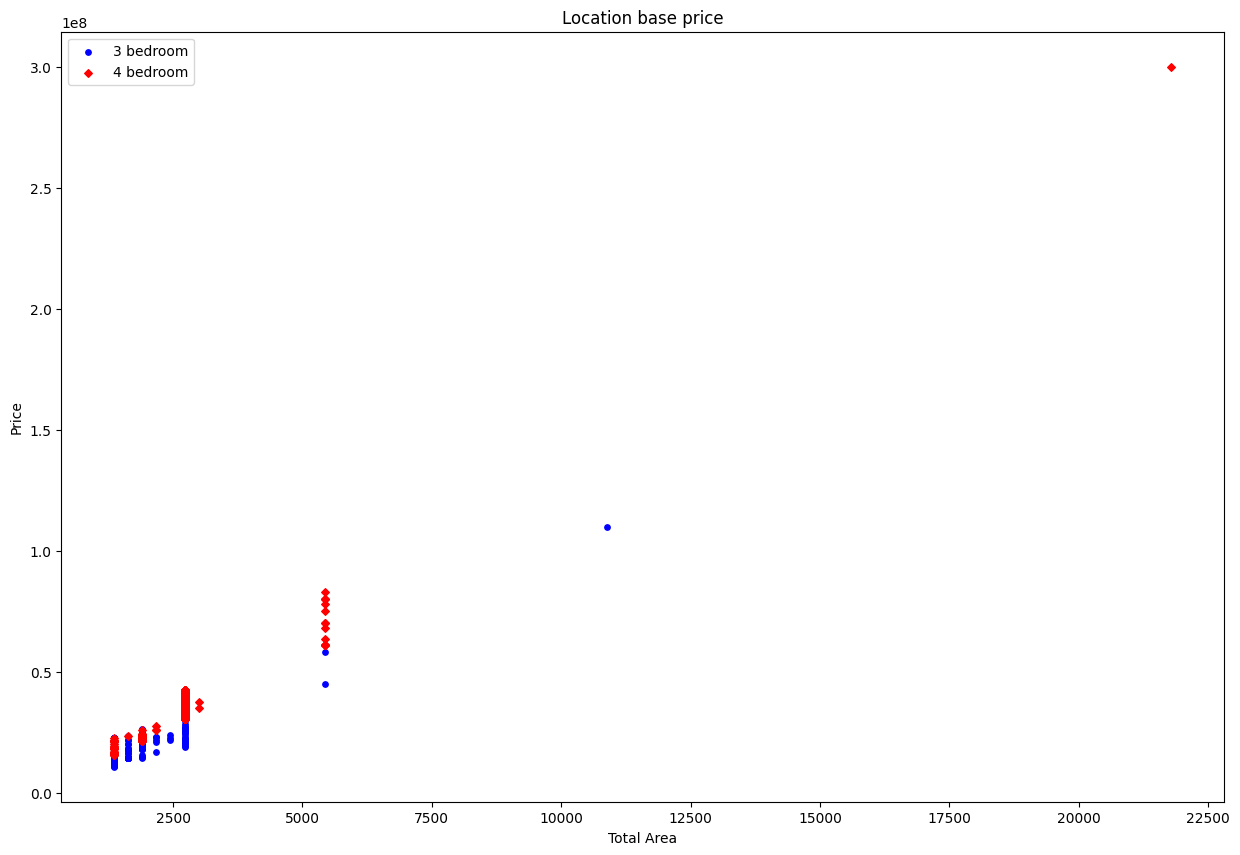

In [366]:
plot_scatter_chart(df10,"DHA Defence")

In [367]:
df10.describe()

,price,baths,bedrooms,Total_Area,Price_per_Area
count,8.402000e+03,8402.000000,8402.000000,8402.000000,8402.000000
mean,3.164704e+07,4.740538,4.078315,3372.833746,9295.225697
std,3.353410e+07,1.309701,1.099310,6954.236617,2489.460370
min,3.000000e+06,1.000000,1.000000,544.502000,897.864267
25%,1.250000e+07,4.000000,3.000000,1361.255000,8080.778399
50%,2.200000e+07,5.000000,4.000000,2722.510000,8815.394617
75%,3.600000e+07,6.000000,5.000000,5445.000000,10869.696399
max,7.000000e+08,12.000000,11.000000,522720.000000,16758.494031


Text(0, 0.5, 'Count')

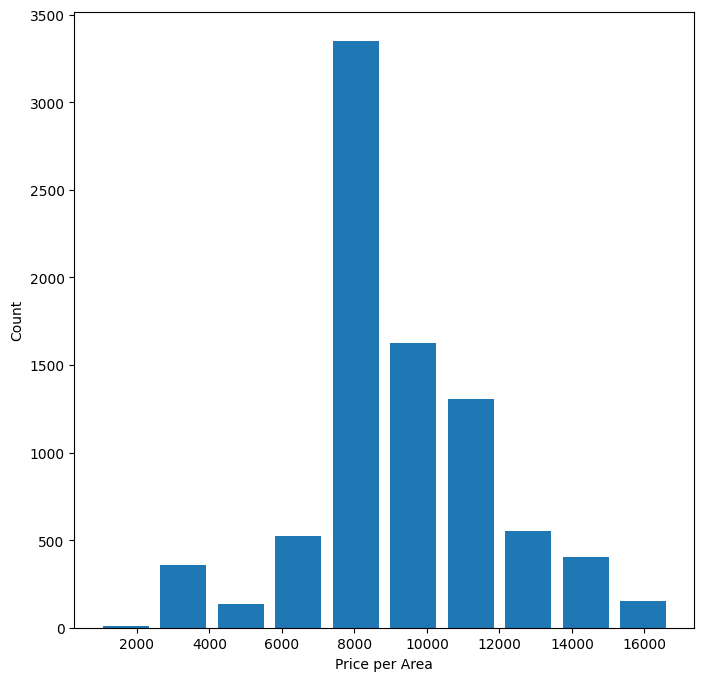

In [368]:
matplotlib.rcParams["figure.figsize"]=(8,8)
plt.hist(df10.Price_per_Area,rwidth=0.8)
plt.xlabel("Price per Area")
plt.ylabel("Count")

In [369]:
df10=df10.drop(['city','Price_per_Area'],axis="columns")
df10.shape

(8402, 6)

In [370]:
df10.head(3)

,property_type,price,location,baths,bedrooms,Total_Area
1376,House,15000000,Al Rehman Garden,6,4,2178.008
1377,House,7500000,Al Rehman Garden,3,3,1361.255
1379,House,8800000,Al Rehman Garden,6,4,1361.255


In [371]:
dummies=pd.get_dummies(df10.location)
dummies=dummies.drop('Wapda Town',axis='columns')
df11=pd.concat([df10,dummies],axis='columns')
df11.head(3)

,property_type,price,location,baths,bedrooms,Total_Area,Al Rehman Garden,Allama Iqbal Town,Askari,Bahria Orchard,Bahria Town,DHA 11 Rahbar,DHA Defence,Gulberg,Johar Town,Model Town,Paragon City,State Life Housing Society
1376,House,15000000,Al Rehman Garden,6,4,2178.008,1,0,0,0,0,0,0,0,0,0,0,0
1377,House,7500000,Al Rehman Garden,3,3,1361.255,1,0,0,0,0,0,0,0,0,0,0,0
1379,House,8800000,Al Rehman Garden,6,4,1361.255,1,0,0,0,0,0,0,0,0,0,0,0


In [372]:
df12=df11.drop(['location','property_type'],axis='columns')

In [373]:
df12.head(3)

,price,baths,bedrooms,Total_Area,Al Rehman Garden,Allama Iqbal Town,Askari,Bahria Orchard,Bahria Town,DHA 11 Rahbar,DHA Defence,Gulberg,Johar Town,Model Town,Paragon City,State Life Housing Society
1376,15000000,6,4,2178.008,1,0,0,0,0,0,0,0,0,0,0,0
1377,7500000,3,3,1361.255,1,0,0,0,0,0,0,0,0,0,0,0
1379,8800000,6,4,1361.255,1,0,0,0,0,0,0,0,0,0,0,0


In [374]:
df12.shape

(8402, 16)

In [382]:
x=df12.drop('price',axis='columns')
y=df12.price

In [383]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.669498564780918

In [395]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score


def grid_search_cv(X, y, cv_splits=5):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the models and their parameter grids
    lasso = Lasso()
    lasso_params = {'alpha': [0.1, 1, 10]}
    
    lr = LinearRegression()
    lr_params = {}
    
    dt = DecisionTreeRegressor(random_state=42)
    dt_params = {'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10],
                 'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']}
    
    # Create a list of models and their parameter grids
    models = [(lasso, lasso_params), (lr, lr_params), (dt, dt_params)]
    
    # Define the cross-validation strategy
    kfold = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    # Perform grid search cross-validation for each model and store the test scores in a dictionary
    test_scores = {}
    for model, params in models:
        gs = GridSearchCV(model, params, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        test_scores[model.__class__.__name__] = {'best_params': gs.best_params_, 'test_r2_score': r2}
    
    # Print the test scores in the desired format
    sorted_scores = sorted(test_scores.items(), key=lambda x: x[1]['test_r2_score'], reverse=True)
    for model_name, scores in sorted_scores:
        print(f"{model_name}:")
        for param, value in scores['best_params'].items():
            print(f"  {param}: {value}")
        print(f"  Test R2 Score: {scores['test_r2_score']}\n")

In [397]:
import warnings
warnings.filterwarnings('ignore')

test_scores = grid_search_cv(x, y, cv_splits=5)
print(test_scores)

DecisionTreeRegressor:
  criterion: friedman_mse
  max_depth: 10
  min_samples_split: 2
  splitter: random
  Test R2 Score: 0.900421616831466

Lasso:
  alpha: 0.1
  Test R2 Score: 0.6557886088097249

LinearRegression:
  Test R2 Score: 0.6557886053441973

None


In [408]:
my_model = DecisionTreeRegressor(max_depth=10, min_samples_split=2, splitter='random', criterion='friedman_mse')
my_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, splitter='random')

In [409]:
x.columns

Index(['baths', 'bedrooms', 'Total_Area', 'Al Rehman Garden',
       'Allama Iqbal Town', 'Askari', 'Bahria Orchard', 'Bahria Town',
       'DHA 11 Rahbar', 'DHA Defence', 'Gulberg', 'Johar Town', 'Model Town',
       'Paragon City', 'State Life Housing Society'],
      dtype='object')

In [410]:
def predict_price(location,baths,bedrooms,Total_Area):
    loc_index=np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=baths
    X[1]=bedrooms
    X[2]=Total_Area
    if loc_index>=0:
        X[loc_index]=1
    
    return my_model.predict([X])[0]

In [446]:
predict_price('Paragon City',3,3,1000)

11377911.646586346

In [447]:
predict_price('Paragon City',5,5,1000)

24046630.727762803

In [448]:
import pickle
with open('Lahore_House_Model.pickle','wb') as f:
    pickle.dump(my_model,f)

In [450]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))